In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from copy import deepcopy

In [ ]:
'''
target value:
0 - Non-REM sleep
1 - REM sleep
'''

def preprocess_df(df, 
                  final_df = None, 
                  flag = False, 
                  rem_dict = None, 
                  start_time = None, 
                  end_time = None, 
                  awakening_dict = None):
  
  df = df.rename(columns={'v1' : 'acceleration_x', 
                          'v2' : 'acceleration_y',
                          'v3' : 'acceleration_z',
                          'v4' : 'gyro_x',
                          'v5' : 'gyro_y',
                          'v6' : 'gyro_z'})
  
  date_format = '%Y-%m-%d %H:%M:%S.%f'
  df['time'] = df['time'].astype('datetime64')
  df = df.drop(columns = ['pocket_id', 'v7'])
  df['target'] = 0

  if start_time:
    df = df[df['time'] >= datetime.strptime(start_time, date_format)]

  if end_time:
    df = df[df['time'] <= datetime.strptime(end_time, date_format)]

  if awakening_dict:
    for start_awakening, end_awakening in awakening_dict.items():
      start_awakening = pd.to_datetime(start_awakening)
      end_awakening = pd.to_datetime(end_awakening)
      df = df.loc[(df['time'] < start_awakening) | (df['time'] > end_awakening)]

  if start_time or end_time or awakening_dict:
    df = df.reset_index(drop = True)

  if rem_dict:
    for start_rem, end_rem in rem_dict.items():
      start_rem = pd.to_datetime(start_rem)
      end_rem = pd.to_datetime(end_rem)
      df.loc[(df['time'] >= start_rem) & (df['time'] <= end_rem), 'target'] = 1

  if flag:
    final_df = pd.concat([final_df, df], ignore_index = True)
    return df, final_df

  return df

In [ ]:
# df_1 = pd.read_csv('sample_data/1_11_05.csv')
# rem_dict_1 = {'2023-05-11 04:21:03.176031' : '2023-05-11 04:21:03.446468',
#               '' : ''}
# df_1 = preprocess_df(df_1, rem_dict = rem_dict_1)
# final_df = df_1

# df_1

In [ ]:
df_2 = pd.read_csv('sample_data/2_12_05.csv')

rem_dict_2 = {'2023-05-12 00:55:00.00' : '2023-05-12 00:59:30.00',
              '2023-05-12 01:02:00.00' : '2023-05-12 01:08:30.00',
              '2023-05-12 02:03:00.00' : '2023-05-12 02:09:30.00',
              '2023-05-12 02:17:00.00' : '2023-05-12 02:23:30.00',
              '2023-05-12 03:19:00.00' : '2023-05-12 03:26:30.00',
              '2023-05-12 04:21:00.00' : '2023-05-12 04:27:30.00',
              '2023-05-12 04:44:00.00' : '2023-05-12 04:49:30.00',
              '2023-05-12 05:10:00.00' : '2023-05-12 05:19:30.00',
              '2023-05-12 05:22:00.00' : '2023-05-12 05:30:30.00'}

df_2 = preprocess_df(df_2, 
                     rem_dict = rem_dict_2, 
                     start_time = '2023-05-12 00:20:30.00', 
                     end_time = '2023-05-12 06:30:00.00')

final_df = df_2
df_2

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,-494,-759,4060,0,0,1,2023-05-12 00:20:30.041084,0
1,-492,-766,4061,-5,1,-1,2023-05-12 00:20:30.057801,0
2,-489,-765,4063,2,2,2,2023-05-12 00:20:30.175278,0
3,-492,-766,4058,1,3,1,2023-05-12 00:20:30.266675,0
4,-499,-766,4060,-1,2,0,2023-05-12 00:20:30.355109,0
...,...,...,...,...,...,...,...,...
278161,890,-299,4052,0,0,1,2023-05-12 06:29:59.595465,0
278162,889,-303,4047,0,0,0,2023-05-12 06:29:59.692641,0
278163,894,-298,4055,0,1,1,2023-05-12 06:29:59.784663,0
278164,880,-313,4057,-7,-4,1,2023-05-12 06:29:59.875341,0


In [ ]:
df_2['target'].value_counts()

0    231867
1     46299
Name: target, dtype: int64

In [ ]:
df_3 = pd.read_csv('sample_data/3_19_05.csv')

rem_dict_3 = {'2023-05-19 01:54:00.00' : '2023-05-19 02:04:30.00',
              '2023-05-19 02:07:00.00' : '2023-05-19 02:13:30.00',
              '2023-05-19 02:32:00.00' : '2023-05-19 02:41:30.00',
              '2023-05-19 03:03:00.00' : '2023-05-19 03:10:30.00',
              '2023-05-19 03:17:00.00' : '2023-05-19 03:24:30.00',
              '2023-05-19 03:32:00.00' : '2023-05-19 03:37:30.00',
              '2023-05-19 04:01:00.00' : '2023-05-19 04:06:30.00',
              '2023-05-19 05:11:00.00' : '2023-05-19 05:16:30.00',
              '2023-05-19 06:09:00.00' : '2023-05-19 06:13:30.00'}

df_3, final_df = preprocess_df(df_3, 
                               final_df = final_df, 
                               flag = True, 
                               rem_dict = rem_dict_3, 
                               start_time = '2023-05-19 01:10:30.00', 
                               end_time = '2023-05-19 06:45:00.00')

df_3

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,672,-1351,3895,5,3,-1,2023-05-19 01:10:30.029734,0
1,651,-1344,3894,8,3,-2,2023-05-19 01:10:30.119512,0
2,645,-1335,3892,5,-4,-3,2023-05-19 01:10:30.209810,0
3,655,-1347,3894,4,-6,-4,2023-05-19 01:10:30.254574,0
4,653,-1340,3891,5,-4,-2,2023-05-19 01:10:30.345116,0
...,...,...,...,...,...,...,...,...
251812,2889,2330,1791,6,-8,-3,2023-05-19 06:44:59.642161,0
251813,2892,2300,1755,11,-14,0,2023-05-19 06:44:59.730516,0
251814,2895,2306,1753,8,-8,-4,2023-05-19 06:44:59.765746,0
251815,2884,2315,1765,5,-4,-6,2023-05-19 06:44:59.866390,0


In [ ]:
df_3['target'].value_counts()

0    204767
1     47050
Name: target, dtype: int64

In [ ]:
df_4 = pd.read_csv('sample_data/4_20_05.csv')

rem_dict_4 = {'2023-05-20 00:24:00.00' : '2023-05-20 00:31:30.00',
              '2023-05-20 01:03:00.00' : '2023-05-20 01:12:30.00',
              '2023-05-20 01:21:00.00' : '2023-05-20 01:32:30.00',
              '2023-05-20 01:40:00.00' : '2023-05-20 01:44:30.00',
              '2023-05-20 02:37:00.00' : '2023-05-20 02:48:30.00',
              '2023-05-20 03:06:00.00' : '2023-05-20 03:19:30.00',
              '2023-05-20 06:18:00.00' : '2023-05-20 06:28:30.00',
              '2023-05-20 07:03:00.00' : '2023-05-20 07:07:30.00',
              '2023-05-20 07:25:00.00' : '2023-05-20 07:25:30.00'}

df_4, final_df = preprocess_df(df_4, 
                               final_df = final_df,
                               flag = True,
                               rem_dict = rem_dict_4,
                               start_time = '2023-05-20 00:09:00.00',
                               end_time = '2023-05-20 07:50:00.00')

df_4

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,-959,-4005,553,5,-10,1,2023-05-20 00:09:00.113177,0
1,-965,-4005,557,6,-10,1,2023-05-20 00:09:00.157658,0
2,-962,-4004,554,5,-10,2,2023-05-20 00:09:00.202753,0
3,-964,-4005,558,6,-10,2,2023-05-20 00:09:00.293457,0
4,-972,-3998,557,6,-10,2,2023-05-20 00:09:00.382799,0
...,...,...,...,...,...,...,...,...
347045,2157,-1072,3394,5,-9,2,2023-05-20 07:49:59.670022,0
347046,2136,-1072,3406,9,-9,-5,2023-05-20 07:49:59.759978,0
347047,2143,-1068,3393,11,-10,-3,2023-05-20 07:49:59.804889,0
347048,2138,-1076,3407,6,-9,2,2023-05-20 07:49:59.895394,0


In [ ]:
df_4['target'].value_counts()

0    291717
1     55333
Name: target, dtype: int64

In [ ]:
df_5 = pd.read_csv('sample_data/5_21_05.csv')

rem_dict_5 = {'2023-05-21 01:38:00.00' : '2023-05-21 01:46:30.00',
              '2023-05-21 01:55:00.00' : '2023-05-21 02:15:30.00',
              '2023-05-21 02:21:00.00' : '2023-05-21 02:28:30.00',
              '2023-05-21 02:33:00.00' : '2023-05-21 02:37:30.00',
              '2023-05-21 02:39:00.00' : '2023-05-21 02:44:30.00',
              '2023-05-21 03:50:00.00' : '2023-05-21 03:52:30.00',
              '2023-05-21 04:14:00.00' : '2023-05-21 04:18:30.00',
              '2023-05-21 05:47:00.00' : '2023-05-21 05:51:30.00',
              '2023-05-21 07:05:00.00' : '2023-05-21 07:23:30.00',
              '2023-05-21 09:30:00.00' : '2023-05-21 09:35:30.00'}

df_5, final_df = preprocess_df(df_5, 
                               final_df = final_df,
                               flag = True,
                               rem_dict = rem_dict_5,
                               start_time = '2023-05-21 01:32:00.00',
                               end_time = '2023-05-21 09:40:00.00')

df_5

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,-62,-283,4153,8,-7,-1,2023-05-21 01:32:00.062797,0
1,-59,-285,4153,7,-7,-1,2023-05-21 01:32:00.152653,0
2,-59,-283,4151,9,-6,-1,2023-05-21 01:32:00.287592,0
3,-58,-283,4147,5,-7,-2,2023-05-21 01:32:00.332378,0
4,-60,-270,4153,8,-5,-2,2023-05-21 01:32:00.421728,0
...,...,...,...,...,...,...,...,...
366965,2075,-125,3590,2,-4,1,2023-05-21 09:39:59.612519,0
366966,2070,-122,3592,3,-5,0,2023-05-21 09:39:59.748362,0
366967,2074,-125,3595,3,-5,-1,2023-05-21 09:39:59.792577,0
366968,2075,-121,3589,2,-5,-1,2023-05-21 09:39:59.883140,0


In [ ]:
df_5['target'].value_counts()

0    305238
1     61732
Name: target, dtype: int64

In [ ]:
df_6 = pd.read_csv('sample_data/6_25_05.csv')

rem_dict_6 = {'2023-05-25 02:49:00.00' : '2023-05-25 03:05:30.00',
              '2023-05-25 03:07:00.00' : '2023-05-25 03:14:30.00',
              '2023-05-25 02:32:00.00' : '2023-05-25 03:36:30.00',
              '2023-05-25 03:39:00.00' : '2023-05-25 03:43:30.00',
              '2023-05-25 03:47:00.00' : '2023-05-25 03:50:30.00',
              '2023-05-25 03:54:00.00' : '2023-05-25 03:59:30.00',
              '2023-05-25 04:04:00.00' : '2023-05-25 04:18:30.00',
              '2023-05-25 04:22:00.00' : '2023-05-25 04:26:30.00',
              '2023-05-25 05:12:00.00' : '2023-05-25 05:15:30.00',
              '2023-05-25 05:27:00.00' : '2023-05-25 05:48:30.00',
              '2023-05-25 06:30:00.00' : '2023-05-25 06:34:30.00',
              '2023-05-25 08:01:00.00' : '2023-05-25 08:11:30.00',
              '2023-05-25 08:59:00.00' : '2023-05-25 09:06:30.00',
              '2023-05-25 10:05:00.00' : '2023-05-25 10:11:30.00'}

awakening_dict_6 = {'2023-05-25 07:00:00.00' : '2023-05-25 07:38:00.00'}


df_6, final_df = preprocess_df(df_6, 
                               final_df = final_df,
                               flag = True,
                               rem_dict = rem_dict_6,
                               awakening_dict = awakening_dict_6,
                               start_time = '2023-05-25 02:32:00.00',
                               end_time = '2023-05-25 10:19:00.00')

df_6

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,-2847,411,3008,11,-11,2,2023-05-25 02:32:00.059511,1
1,-2847,408,3005,9,-13,0,2023-05-25 02:32:00.154261,1
2,-2843,411,3011,9,-19,1,2023-05-25 02:32:00.241447,1
3,-2840,411,3014,9,-12,-2,2023-05-25 02:32:00.284093,1
4,-2842,407,3011,8,-7,-3,2023-05-25 02:32:00.373674,1
...,...,...,...,...,...,...,...,...
280998,3521,2028,173,-17,-13,-6,2023-05-25 09:23:15.846089,0
280999,3532,2011,197,-8,-11,-3,2023-05-25 09:23:15.936793,0
281000,3529,2021,186,-21,-8,-1,2023-05-25 09:23:16.026517,0
281001,3526,2016,204,-22,-3,-2,2023-05-25 09:23:16.071961,0


In [ ]:
df_6['target'].value_counts()

0    172224
1    108779
Name: target, dtype: int64

In [ ]:
df_7 = pd.read_csv('sample_data/7_26_05.csv')

rem_dict_7 = {'2023-05-26 03:32:00.00' : '2023-05-26 03:42:30.00',
              '2023-05-26 03:44:00.00' : '2023-05-26 03:51:30.00',
              '2023-05-26 03:54:00.00' : '2023-05-26 03:58:30.00',
              '2023-05-26 05:01:00.00' : '2023-05-26 05:22:30.00',
              '2023-05-26 07:20:00.00' : '2023-05-26 07:26:30.00'}

df_7, final_df = preprocess_df(df_7, 
                               final_df = final_df,
                               flag = True,
                               rem_dict = rem_dict_7,
                               start_time = '2023-05-26 02:51:00.00',
                               end_time = '2023-05-26 07:50:00.00')

df_7

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,2780,2356,1749,13,20,17,2023-05-26 02:51:00.054156,0
1,2811,2474,1641,81,-87,-32,2023-05-26 02:51:00.143871,0
2,2823,2551,1475,98,-116,-64,2023-05-26 02:51:00.189076,0
3,2808,2581,1359,72,-99,-78,2023-05-26 02:51:00.279459,0
4,2806,2749,1297,52,-26,-56,2023-05-26 02:51:00.370152,0
...,...,...,...,...,...,...,...,...
222634,2095,123,3583,11,-7,-1,2023-05-26 07:46:44.039838,0
222635,2101,136,3586,6,-9,0,2023-05-26 07:46:44.130824,0
222636,2098,145,3577,9,-9,-2,2023-05-26 07:46:44.221912,0
222637,2101,131,3574,8,-10,-2,2023-05-26 07:46:44.265720,0


In [ ]:
df_7['target'].value_counts()

0    184622
1     38017
Name: target, dtype: int64

In [ ]:
final_df

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z,time,target
0,-494,-759,4060,0,0,1,2023-05-12 00:20:30.041084,0
1,-492,-766,4061,-5,1,-1,2023-05-12 00:20:30.057801,0
2,-489,-765,4063,2,2,2,2023-05-12 00:20:30.175278,0
3,-492,-766,4058,1,3,1,2023-05-12 00:20:30.266675,0
4,-499,-766,4060,-1,2,0,2023-05-12 00:20:30.355109,0
...,...,...,...,...,...,...,...,...
1747640,2095,123,3583,11,-7,-1,2023-05-26 07:46:44.039838,0
1747641,2101,136,3586,6,-9,0,2023-05-26 07:46:44.130824,0
1747642,2098,145,3577,9,-9,-2,2023-05-26 07:46:44.221912,0
1747643,2101,131,3574,8,-10,-2,2023-05-26 07:46:44.265720,0


In [ ]:
final_df['target'].value_counts()

0    1390435
1     357210
Name: target, dtype: int64

In [ ]:
final_df.to_csv(r'final_df_sleep_v1.csv', index = False)

# Create DataFrame with window

In [ ]:
def prepare_df(df, n_steps = 1):
  df = deepcopy(df)

  for i in range(1, n_steps + 1):
    df[f'acceleration_x(t-{i})'] = df['acceleration_x'].shift(i)
    df[f'acceleration_y(t-{i})'] = df['acceleration_y'].shift(i)
    df[f'acceleration_z(t-{i})'] = df['acceleration_z'].shift(i)
    df[f'gyro_x(t-{i})'] = df['gyro_x'].shift(i)
    df[f'gyro_y(t-{i})'] = df['gyro_y'].shift(i)
    df[f'gyro_z(t-{i})'] = df['gyro_z'].shift(i)

  df.dropna(inplace = True)

  return df

In [ ]:
shifted_df = prepare_df(final_df, 20)
shifted_df

In [ ]:
shifted_df.to_csv(r'shifted_df_sleep_v1_20.csv', index = False)

# Графики

In [ ]:
df_2_ = df_2.drop(columns = ['target'])
df_2_ = df_2_.set_index('time')
df_2_

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
time,,,,,,
2023-05-12 00:09:16.996147,3885,-104,1355,7,-8,-13
2023-05-12 00:09:17.057673,3886,-103,1354,6,-8,-13
2023-05-12 00:09:17.145213,3885,-104,1355,7,-8,-13
2023-05-12 00:09:17.188892,3887,-105,1354,7,-8,-13
2023-05-12 00:09:17.280050,3886,-106,1354,7,-8,-12
...,...,...,...,...,...,...
2023-05-12 06:36:35.008728,-1490,-3530,-1020,-17,17,19
2023-05-12 06:36:35.101225,-1516,-3700,-1084,8,-12,16
2023-05-12 06:36:35.145413,-1566,-3807,-1062,-26,1,15


In [ ]:
df_3_ = df_3.drop(columns = ['target'])
df_3_ = df_3_.set_index('time')
df_3_

,acceleration_x,acceleration_y,acceleration_z,gyro_x,gyro_y,gyro_z
time,,,,,,
2023-05-13 00:46:37.990357,2225,-3473,270,7,-6,-2
2023-05-13 00:46:38.053506,2230,-3473,256,6,-4,0
2023-05-13 00:46:38.141181,2236,-3459,264,3,-5,4
2023-05-13 00:46:38.185430,2214,-3474,282,3,-5,2
2023-05-13 00:46:38.276112,2231,-3460,265,1,-8,1
...,...,...,...,...,...,...
2023-05-13 07:00:25.506870,-4078,-777,-228,1,-11,2
2023-05-13 07:00:25.598904,-4079,-762,-218,3,-5,1
2023-05-13 07:00:25.649455,-4078,-754,-230,1,0,0


In [ ]:
def Vizualize(df_to_vizualize):

  plt.figure(figsize = (12.8, 9.6))
  plt.grid(True)
  plt.plot(df_to_vizualize.to_numpy())
  plt.xticks(rotation = 90, fontsize = 8)
  plt.xticks(np.arange(0, len(df_to_vizualize.to_numpy()), 11256))
  plt.show()

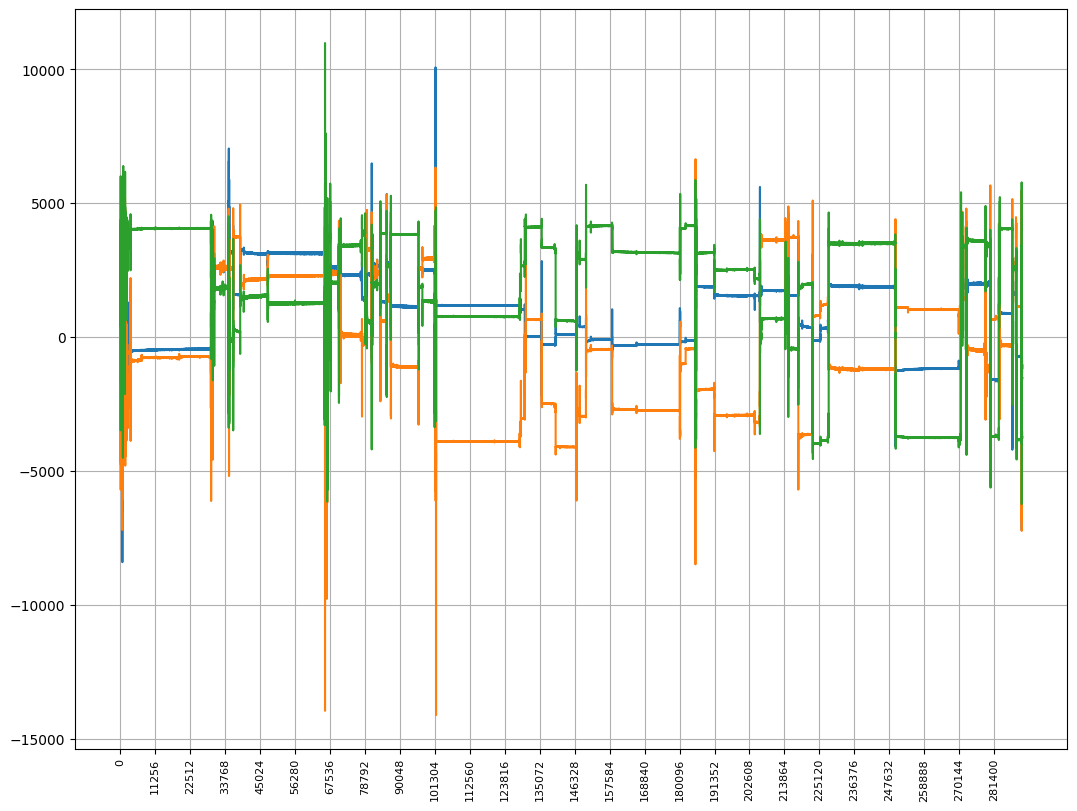

In [ ]:
df_to_plot = df_2_.drop(columns = ['gyro_x', 'gyro_y', 'gyro_z'])
Vizualize(df_to_plot)

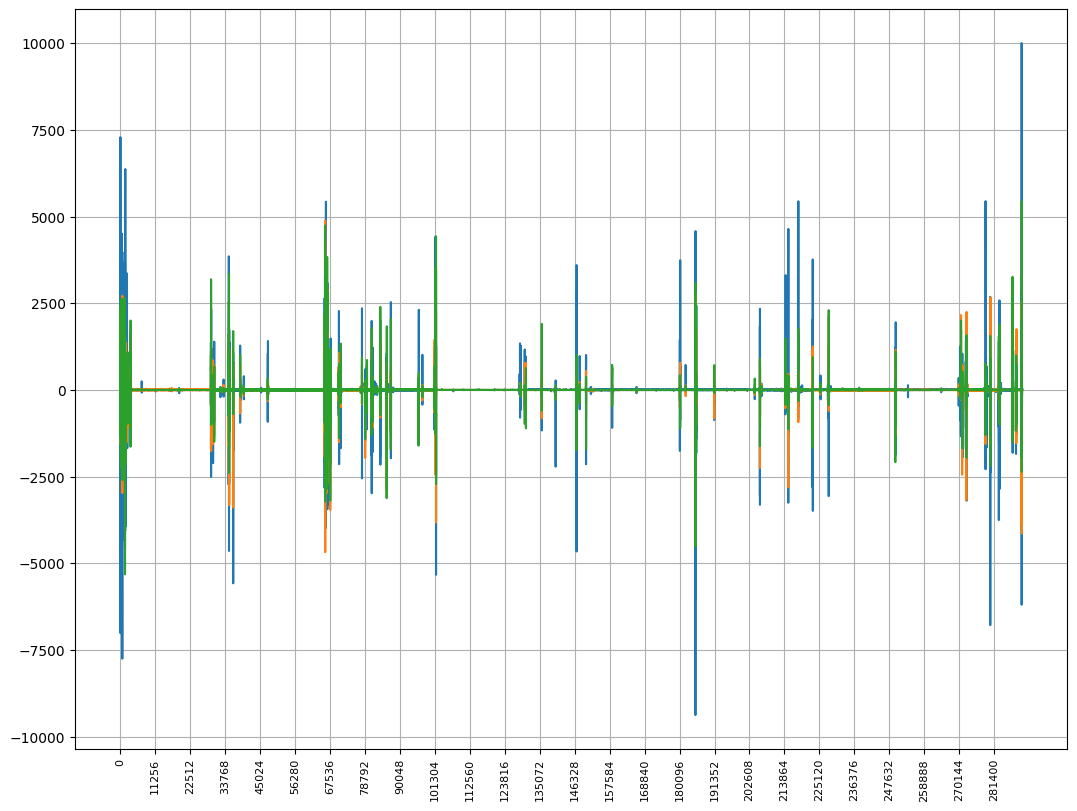

In [ ]:
df_to_plot_1 = df_2_.drop(columns = ['acceleration_x', 'acceleration_y', 'acceleration_z'])
Vizualize(df_to_plot_1)


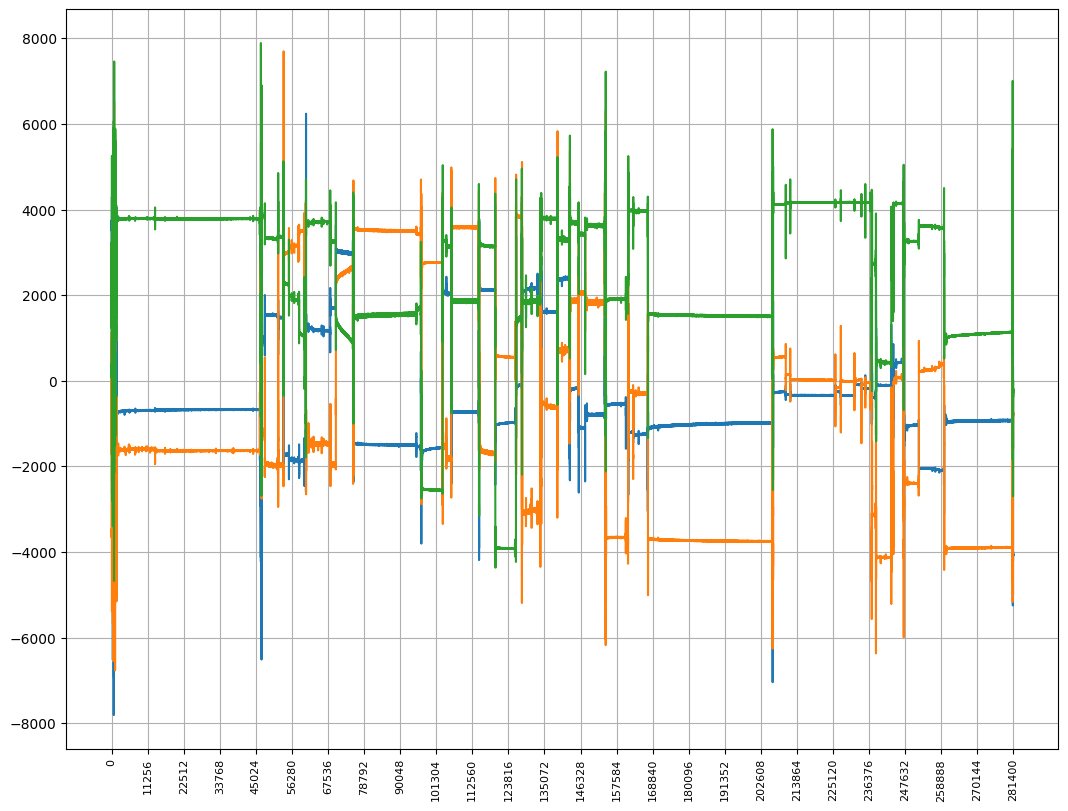

In [ ]:
df_to_plot_2 = df_3_.drop(columns = ['gyro_x', 'gyro_y', 'gyro_z'])
Vizualize(df_to_plot_2)

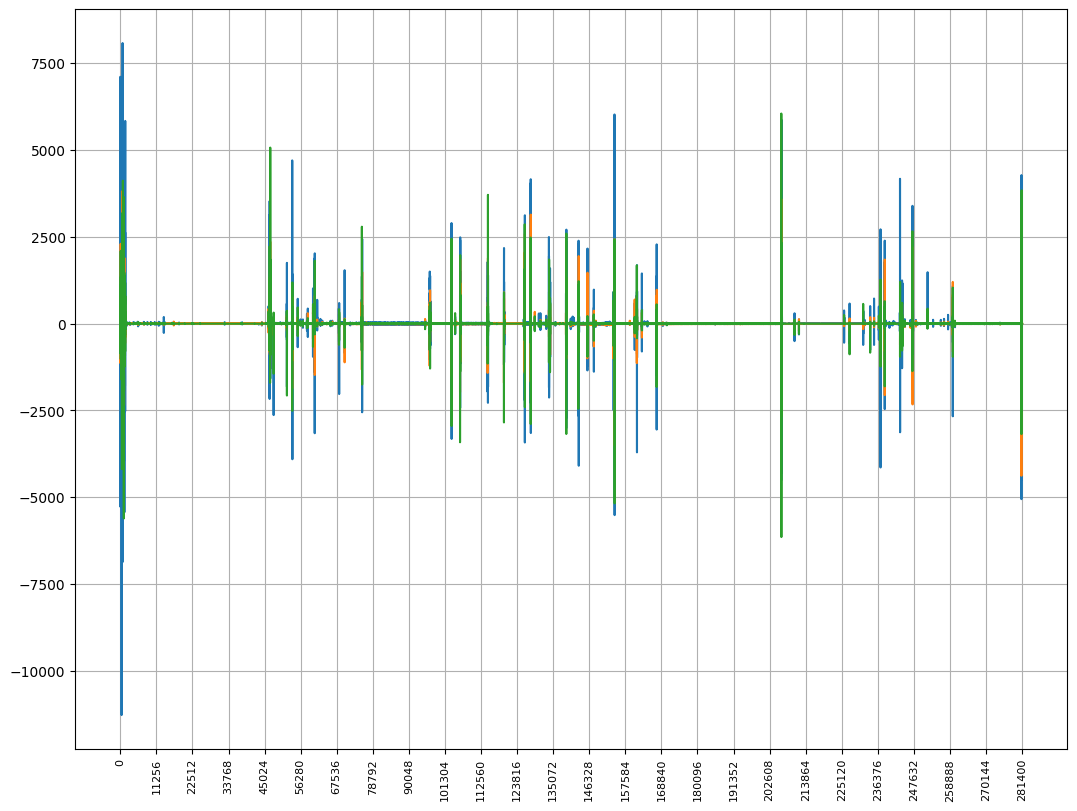

In [ ]:
df_to_plot_3 = df_3_.drop(columns = ['acceleration_x', 'acceleration_y', 'acceleration_z'])
Vizualize(df_to_plot_3)